In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Função para converter uma imagem colorida em níveis de cinza
def rgb_para_cinza(imagem):
    altura, largura, canais = imagem.shape
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)
    for i in range(altura):
        for j in range(largura):
            if canais == 3:  # Imagem com RGB
                r, g, b = imagem[i, j]
            elif canais == 4:  # Imagem com RGBA
                r, g, b, _ = imagem[i, j]
            imagem_cinza[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
    return imagem_cinza

# Função para binarizar uma imagem em níveis de preto e branco
def binarizar(imagem_cinza, limiar=128):
    altura, largura = imagem_cinza.shape
    imagem_binaria = np.zeros((altura, largura), dtype=np.uint8)
    for i in range(altura):
        for j in range(largura):
            imagem_binaria[i, j] = 255 if imagem_cinza[i, j] > limiar else 0
    return imagem_binaria

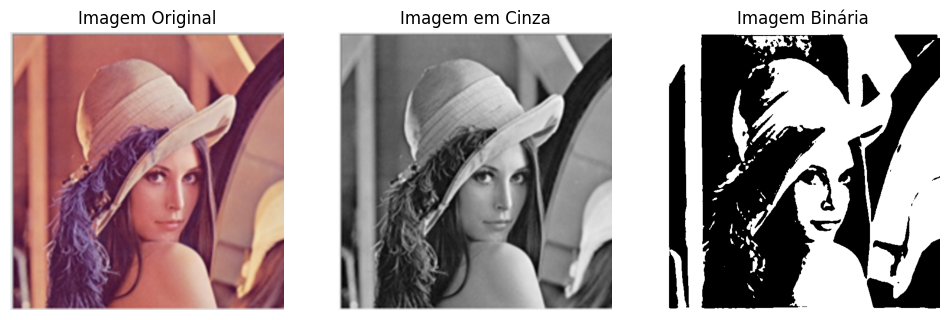

In [10]:
# Leitura da imagem enviada pelo usuário (como matriz)
from matplotlib.image import imread
imagem = imread('/content/teste.png')  # Carrega a imagem

# Normaliza para escala 0-255, se necessário
if imagem.max() <= 1.0:
    imagem = (imagem * 255).astype(np.uint8)

# Convertendo a imagem
imagem_cinza = rgb_para_cinza(imagem.astype(np.uint8))
imagem_binaria = binarizar(imagem_cinza)

# Visualização dos resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(imagem.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem em Cinza")
plt.imshow(imagem_cinza, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Binária")
plt.imshow(imagem_binaria, cmap='gray')
plt.axis('off')

plt.show()
